# Reading data from SQL database!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'C:\Users\Acer\Downloads\Resources/zomato_rawdata.sqlite')

In [4]:
pd.read_sql_query("SELECT * FROM Users" ,con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df = pd.read_sql_query("SELECT * FROM Users" ,con)

In [6]:
df.shape

(51717, 18)

In [7]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Deal with missing value :

In [8]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [9]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'].replace(('NEW', '-'), np.nan, inplace=True)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x)==str else x)

In [15]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

# Analysing relation between online order and rating!

In [16]:
x = pd.crosstab(df['rate'], df['online_order'])

In [17]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

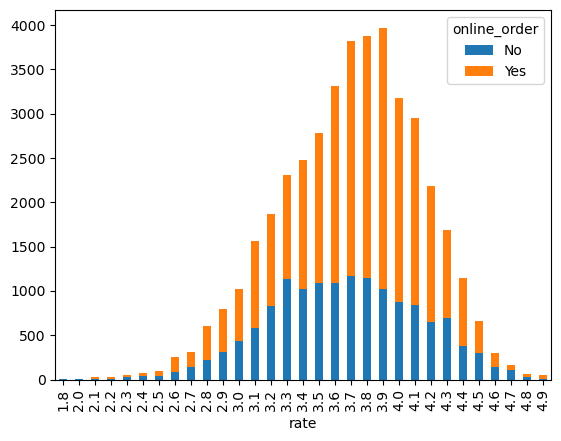

In [18]:
x.plot(kind='bar', stacked=True)

In [19]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [20]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [21]:
normalize_df = x.div(x.sum(axis=1).astype(float), axis=0)

In [22]:
normalize_df 

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


<Axes: xlabel='rate'>

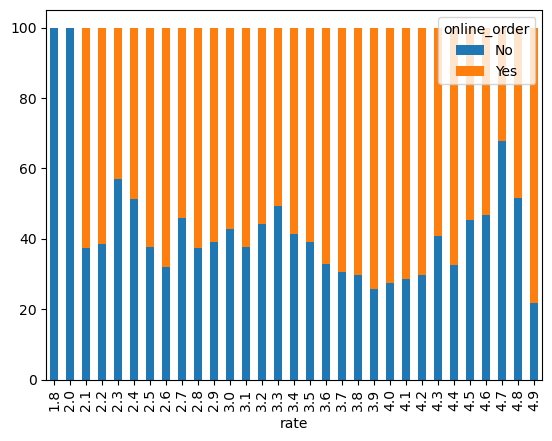

In [23]:
(normalize_df*100).plot(kind='bar', stacked=True)

# Text cleaning!

In [24]:
df['rest_type'].isnull().sum()

227

In [25]:
data = df.dropna(subset=['rest_type'])

In [26]:
data['rest_type'].isnull().sum()

0

In [27]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [28]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [29]:
quick_bites_df.shape

(20639, 18)

In [30]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [31]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [32]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

C:\Users\Acer\AppData\Local\Temp\ipykernel_21400\4206969916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [33]:
from nltk.corpus import RegexpTokenizer

In [34]:
tokenizer = RegexpTokenizer ("[a-zA-z]+")

In [35]:
tokenizer

RegexpTokenizer(pattern='[a-zA-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [36]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['[',
 'rated',
 'rated\\n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated\\n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated\\n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'place',

In [37]:
sample = data[0:10000]

In [38]:
reviews_tokens= sample['reviews_list'].apply(tokenizer.tokenize) 

# Performing unigram analysis :

In [39]:
reviews_tokens

0        [[, Rated, RATED\n, A, beautiful, place, to, d...
1        [[, Rated, RATED\n, Had, been, here, for, dinn...
2        [[, Rated, RATED\n, Ambience, is, not, that, g...
3        [[, Rated, RATED\n, Great, food, and, proper, ...
4        [[, Rated, RATED\n, Very, good, restaurant, in...
                               ...                        
10046    [[, Rated, RATED\n, A, simplistic, joy, for, l...
10047                         [[, Rated, RATED\n, Good, ]]
10048    [[, Rated, RATED\n, Vry, gud, taste, and, some...
10049                                                 [[]]
10050                                                 [[]]
Name: reviews_list, Length: 10000, dtype: object

In [40]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stop = stopwords.words('english')

In [42]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
stop.extend(['Rated', 'RATED', 'n', 'x', 'nan','rated', 'RATED\\n', '\\x'])

In [44]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
reviews_tokens

0        [[, Rated, RATED\n, A, beautiful, place, to, d...
1        [[, Rated, RATED\n, Had, been, here, for, dinn...
2        [[, Rated, RATED\n, Ambience, is, not, that, g...
3        [[, Rated, RATED\n, Great, food, and, proper, ...
4        [[, Rated, RATED\n, Very, good, restaurant, in...
                               ...                        
10046    [[, Rated, RATED\n, A, simplistic, joy, for, l...
10047                         [[, Rated, RATED\n, Good, ]]
10048    [[, Rated, RATED\n, Vry, gud, taste, and, some...
10049                                                 [[]]
10050                                                 [[]]
Name: reviews_list, Length: 10000, dtype: object

In [46]:
rev3 = reviews_tokens[3]
print(rev3)

['[', 'Rated', 'RATED\\n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED\\n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED\\n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', '

In [47]:
print([token for token in rev3 if token not in stop])

['[', 'Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged',

In [48]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [49]:
reviews_tokens_clean

0        [[, A, beautiful, place, dine, The, interiors,...
1        [[, Had, dinner, family, Turned, good, choose,...
2        [[, Ambience, good, enough, pocket, friendly, ...
3        [[, Great, food, proper, Karnataka, style, ful...
4        [[, Very, good, restaurant, neighbourhood, Buf...
                               ...                        
10046    [[, A, simplistic, joy, local, biryani, lovers...
10047                                         [[, Good, ]]
10048    [[, Vry, gud, taste, something, different, mus...
10049                                                 [[]]
10050                                                 [[]]
Name: reviews_list, Length: 10000, dtype: object

In [50]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [51]:
total_reviews_2D = list(reviews_tokens_clean)

In [52]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [53]:
total_reviews_1D

['[',
 'A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 '\\nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said

In [54]:
from nltk import FreqDist

In [55]:
fd = FreqDist()

In [56]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [57]:
fd.most_common(20)

[('place', 138705),
 ('I', 137633),
 ('good', 132582),
 ('food', 125297),
 ('The', 97463),
 ('chicken', 46614),
 ('service', 40819),
 ('taste', 39672),
 ('ordered', 39318),
 ('great', 34130),
 ('really', 33939),
 ('time', 32809),
 ('try', 32143),
 ('one', 32007),
 ('ambience', 31437),
 ('like', 30656),
 ('also', 30601),
 ('It', 30266),
 ('visit', 27293),
 ('restaurant', 26240)]

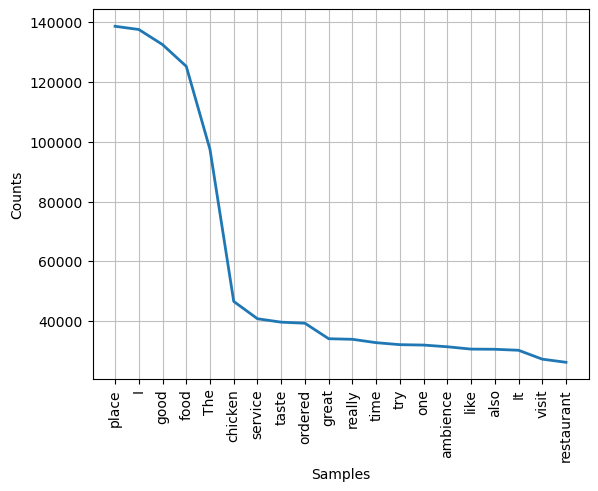

<Axes: xlabel='Samples', ylabel='Counts'>

In [58]:
fd.plot(20)

# Performing Bi-gram & Trigram analysis on data! 

In [59]:
from nltk import FreqDist, bigrams, trigrams

In [60]:
bi_grams = bigrams(total_reviews_1D)

In [61]:
bi_grams

<generator object bigrams at 0x000001609499E500>

In [62]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [63]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10123),
 (('really', 'good'), 9446),
 (('This', 'place'), 8208),
 ((']', '['), 7723),
 (('must', 'try'), 7665),
 (('I', 'would'), 7336),
 (('We', 'ordered'), 7202),
 (('visit', 'place'), 6851),
 (('food', 'good'), 6794),
 (('good', 'food'), 6444),
 (('The', 'place'), 6158),
 (('main', 'course'), 5521),
 (('non', 'veg'), 5321),
 (('good', 'place'), 5317),
 (('ice', 'cream'), 5194),
 (('also', 'good'), 5001),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4500),
 (('good', 'I'), 4073)]

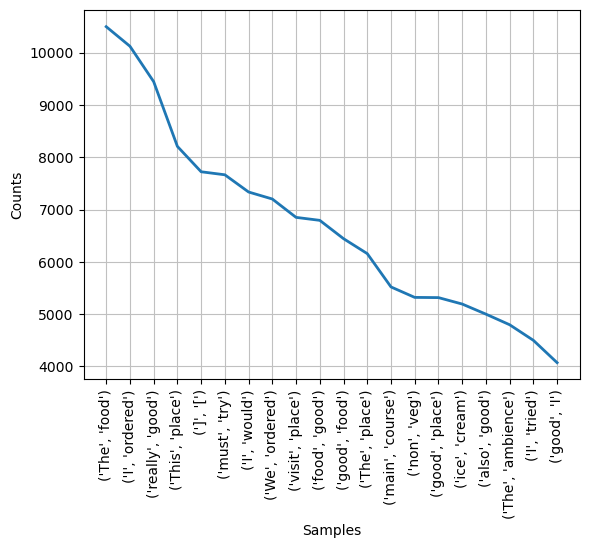

<Axes: xlabel='Samples', ylabel='Counts'>

In [64]:
fd_bigrams.plot(20)

In [65]:
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10123),
 (('really', 'good'), 9446),
 (('This', 'place'), 8208),
 ((']', '['), 7723),
 (('must', 'try'), 7665),
 (('I', 'would'), 7336),
 (('We', 'ordered'), 7202),
 (('visit', 'place'), 6851),
 (('food', 'good'), 6794),
 (('good', 'food'), 6444),
 (('The', 'place'), 6158),
 (('main', 'course'), 5521),
 (('non', 'veg'), 5321),
 (('good', 'place'), 5317),
 (('ice', 'cream'), 5194),
 (('also', 'good'), 5001),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4500),
 (('good', 'I'), 4073),
 (('good', 'The'), 4025),
 (('food', 'I'), 3964),
 (('place', 'I'), 3858),
 (('The', 'service'), 3830),
 (('one', 'best'), 3690),
 (('must', 'visit'), 3648),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3461),
 (('time', 'I'), 3392),
 (('The', 'staff'), 3286),
 (('nice', 'place'), 3273),
 (('pretty', 'good'), 3255),
 (('taste', 'good'), 3254),
 (('place', 'good'), 3078),
 (('I', 'loved'), 3077),
 (('fried', 'rice'), 3074),
 (('pocket', 'friendly'), 3031),
 

In [66]:
tri_grams = trigrams(total_reviews_1D)

In [67]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [68]:
fd_trigrams.most_common(50)

[(('veg', 'non', 'veg'), 1495),
 (('must', 'visit', 'place'), 1475),
 (('The', 'food', 'good'), 1333),
 (('place', 'hangout', 'friends'), 1140),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 955),
 (('place', 'hang', 'friends'), 950),
 (('food', 'really', 'good'), 883),
 ((']', '[', 'I'), 821),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 750),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 673),
 (('I', 'would', 'like'), 619),
 ((']', '[]', '['), 611),
 (('A', 'must', 'try'), 600),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('paneer', 'butter', 'masala'), 554),
 (('I', 'love', 'place'), 552),
 (('really', 'good', 'The'), 551),
 (('A', 'nice', 'place'), 548),
 (('The', 'staff', 'friendly'), 545),
 ((

# Extracting geographical-coordinates from data :

In [69]:
df.head(4)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [70]:
!pip install geocoder
!pip install geopy

In [71]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [72]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [73]:
len(df['location'].unique())

94

In [74]:
df['location'] = df['location'] + ', Banglore, Karnatka, India'

In [75]:
df['location']

0                  Banashankari, Banglore, Karnatka, India
1                  Banashankari, Banglore, Karnatka, India
2                  Banashankari, Banglore, Karnatka, India
3                  Banashankari, Banglore, Karnatka, India
4                  Basavanagudi, Banglore, Karnatka, India
                               ...                        
51712                Whitefield, Banglore, Karnatka, India
51713                Whitefield, Banglore, Karnatka, India
51714                Whitefield, Banglore, Karnatka, India
51715    ITPL Main Road, Whitefield, Banglore, Karnatka...
51716    ITPL Main Road, Whitefield, Banglore, Karnatka...
Name: location, Length: 51717, dtype: object

In [76]:
df['location'].unique()

array(['Banashankari, Banglore, Karnatka, India',
       'Basavanagudi, Banglore, Karnatka, India',
       'Mysore Road, Banglore, Karnatka, India',
       'Jayanagar, Banglore, Karnatka, India',
       'Kumaraswamy Layout, Banglore, Karnatka, India',
       'Rajarajeshwari Nagar, Banglore, Karnatka, India',
       'Vijay Nagar, Banglore, Karnatka, India',
       'Uttarahalli, Banglore, Karnatka, India',
       'JP Nagar, Banglore, Karnatka, India',
       'South Bangalore, Banglore, Karnatka, India',
       'City Market, Banglore, Karnatka, India',
       'Nagarbhavi, Banglore, Karnatka, India',
       'Bannerghatta Road, Banglore, Karnatka, India',
       'BTM, Banglore, Karnatka, India',
       'Kanakapura Road, Banglore, Karnatka, India',
       'Bommanahalli, Banglore, Karnatka, India', nan,
       'CV Raman Nagar, Banglore, Karnatka, India',
       'Electronic City, Banglore, Karnatka, India',
       'HSR, Banglore, Karnatka, India',
       'Marathahalli, Banglore, Karnatka, Indi

In [77]:
df_copy = df.copy()

In [78]:
df_copy['location'].isnull().sum()

21

In [79]:
df_copy = df_copy.dropna(subset=['location'])

In [80]:
df_copy['location'].isnull().sum()

0

In [81]:
locations = pd.DataFrame(df_copy['location'].unique())

In [82]:
locations.columns = ['name']

In [83]:
locations

,name
0,"Banashankari, Banglore, Karnatka, India"
1,"Basavanagudi, Banglore, Karnatka, India"
2,"Mysore Road, Banglore, Karnatka, India"
3,"Jayanagar, Banglore, Karnatka, India"
4,"Kumaraswamy Layout, Banglore, Karnatka, India"
...,...
88,"West Bangalore, Banglore, Karnatka, India"
89,"Magadi Road, Banglore, Karnatka, India"
90,"Yelahanka, Banglore, Karnatka, India"
91,"Sahakara Nagar, Banglore, Karnatka, India"


In [84]:
from geopy.geocoders import Nominatim

In [85]:
geolocater = Nominatim(user_agent = 'app', timeout = None)

In [86]:
lat = []
lon = []

for location in locations['name']:
    location = geolocater.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(np.longitude)

In [87]:
locations['latitude'] = lat
locations['longitude'] = lon

In [88]:
locations

,name,latitude,longitude
0,"Banashankari, Banglore, Karnatka, India",NaN,NaN
1,"Basavanagudi, Banglore, Karnatka, India",NaN,NaN
2,"Mysore Road, Banglore, Karnatka, India",NaN,NaN
3,"Jayanagar, Banglore, Karnatka, India",NaN,NaN
4,"Kumaraswamy Layout, Banglore, Karnatka, India",NaN,NaN
...,...,...,...
88,"West Bangalore, Banglore, Karnatka, India",NaN,NaN
89,"Magadi Road, Banglore, Karnatka, India",NaN,NaN
90,"Yelahanka, Banglore, Karnatka, India",NaN,NaN
91,"Sahakara Nagar, Banglore, Karnatka, India",NaN,NaN
